In [61]:
import os, sys
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [13]:
dt = pd.read_csv('data/heart.csv')

In [14]:
dt.shape

(303, 14)

In [15]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 
               'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 
               'exercise_induced_angina', 'st_depression', 'st_slope', 
               'num_major_vessels', 'thalassemia', 'target']

In [16]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

In [18]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


In [20]:
dt = pd.get_dummies(dt, drop_first=True)

In [23]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


## EDA

In [54]:
dt.isna().sum()

age                                        0
resting_blood_pressure                     0
cholesterol                                0
max_heart_rate_achieved                    0
st_depression                              0
num_major_vessels                          0
target                                     0
sex_male                                   0
chest_pain_type_atypical angina            0
chest_pain_type_non-anginal pain           0
chest_pain_type_typical angina             0
fasting_blood_sugar_lower than 120mg/ml    0
rest_ecg_left ventricular hypertrophy      0
rest_ecg_normal                            0
exercise_induced_angina_yes                0
st_slope_flat                              0
st_slope_upsloping                         0
thalassemia_fixed defect                   0
thalassemia_normal                         0
thalassemia_reversable defect              0
dtype: int64

In [53]:
dt.target.sum()

165

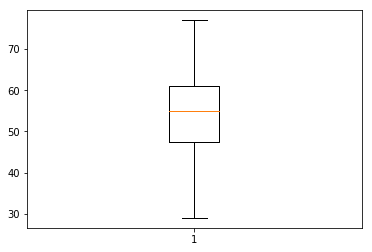

(29, 77)

In [55]:
plt.boxplot(dt.age)
plt.show()
dt.age.min(), dt.age.max()

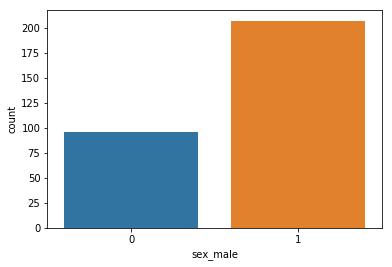

In [63]:
sn.countplot(dt.sex_male)
plt.show()

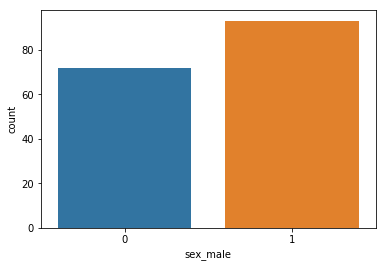

In [73]:
sn.countplot(dt[dt.target == 1].sex_male)
plt.show()

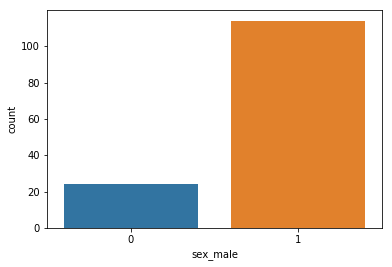

In [74]:
sn.countplot(dt[dt.target == 0].sex_male)
plt.show()

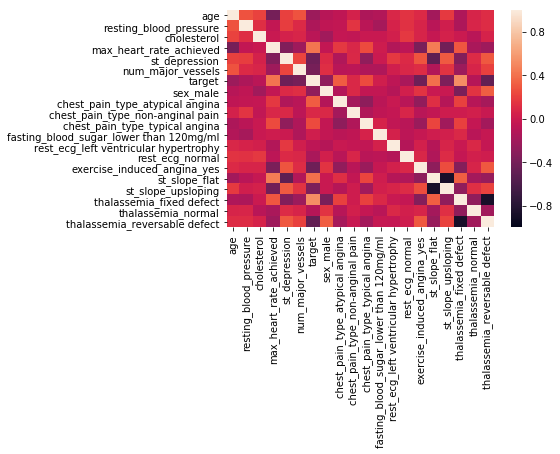

In [69]:
sn.heatmap(dt.corr(), vmin=-1, vmax=1)
plt.show()

# Models

In [49]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score

In [123]:
# Split data into train/test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dt.drop(columns='target'), dt.target, 
                                                   test_size=0.4, random_state=10)

In [124]:
X_train.shape, X_test.shape

((181, 19), (122, 19))

## Random Forest 

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=5).fit(X_train, y_train)
score = rf_model.score(X_test, y_test)
score

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8360655737704918

In [127]:
y_pred = rf_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred[:,1])

0.90287866559053

In [128]:
y_pred = rf_model.predict(X_test)
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7746478873239436, 0.9322033898305084, 0.846153846153846)

In [129]:
confusion_matrix(y_test, y_pred)

array([[47, 16],
       [ 4, 55]])

In [70]:
# Let's evaluate model WITHOUT age info.

rf_model = RandomForestClassifier(max_depth=5).fit(X_train.drop(columns='age'), y_train)
score = rf_model.score(X_test.drop(columns='age'), y_test)
score

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.819672131147541

In [71]:
y_pred = rf_model.predict_proba(X_test.drop(columns='age'))
roc_auc_score(y_test, y_pred[:,1])

0.8945054945054945

In [72]:
y_pred = rf_model.predict(X_test.drop(columns='age'))
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7419354838709677, 0.8846153846153846, 0.8070175438596492)

## Reg. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
lr_model = lr_model.fit(X_train, y_train)

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [48]:
lr_model.score(X_test, y_test)

0.8032786885245902

In [50]:
y_pred_prob = lr_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:,1])

0.8846153846153847

In [51]:
y_pred = lr_model.predict(X_test)
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7692307692307693, 0.7692307692307693, 0.7692307692307693)

In [52]:
confusion_matrix(y_test, y_pred)

array([[29,  6],
       [ 6, 20]])

## Fairness Evaluation Functions

In [130]:
# Demographic Parity

def demo_parity(model, X_test, y_test):
    X_test_male = X_test[X_test.sex_male == 1]
    X_test_female = X_test[X_test.sex_male == 0]
    
    y_pred_male = model.predict(X_test_male)
    y_pred_female = model.predict(X_test_female)
    
    prob_male_pos = np.sum(y_pred_male)/y_pred_male.shape[0]
    prob_male_neg = 1 - prob_male_pos
    
    prob_female_pos = np.sum(y_pred_female)/y_pred_female.shape[0]
    prob_female_neg = 1 - prob_female_pos
    
    print("Prob. of heart disease given male: %f, Prob. of heart disease given female: %f" %
          (prob_male_pos, prob_female_pos))
    
    pos_prob_ratio = min(prob_female_pos/prob_male_pos, prob_male_pos/prob_female_pos)
    
    print("Positive Prob. Ratio: %f"%(pos_prob_ratio))
    

# Equalized Odds

def equal_odds(model, X_test, y_test):
    X_test_pos = X_test[y_test == 1]

    X_test_male_pos = X_test_pos[X_test_pos.sex_male == 1]
    X_test_female_pos = X_test_pos[X_test_pos.sex_male == 0]
    
    y_pred_male = model.predict(X_test_male_pos)
    y_pred_female = model.predict(X_test_female_pos)
    
    prob_male_pos = np.sum(y_pred_male)/y_pred_male.shape[0]
    prob_female_pos = np.sum(y_pred_female)/y_pred_female.shape[0]
    
    print("Prob. of heart disease given male w/ Y=1: %f, Prob. of heart disease given female w/ Y=1: %f"
              %(prob_male_pos, prob_female_pos))
    

# Predictive Parity

def pred_parity(model, X_test, y_test):
    pass

In [131]:
demo_parity(rf_model, X_test, y_test)

Prob. of heart disease given male: 0.533333, Prob. of heart disease given female: 0.718750
Positive Prob. Ratio: 0.742029


In [132]:
equal_odds(rf_model, X_test, y_test)

Prob. of heart disease given male w/ Y=1: 0.894737, Prob. of heart disease given female w/ Y=1: 1.000000


20

In [104]:
X_test.shape

(61, 19)